# Abstracción en Programación Orientada a Objetos

Bienvenido/a. En esta lección aprenderás el concepto de abstracción, clave para modelar sistemas complejos de forma sencilla y efectiva en POO.

## Objetivos
- Comprender qué es la abstracción y su importancia en POO.
- Identificar cómo aplicar la abstracción en el diseño de clases.
- Relacionar la abstracción con ejemplos de la vida real.

---

**Ejemplo de la vida real:** Cuando conduces un carro, solo te interesa el volante, los pedales y el tablero. No necesitas saber cómo funciona el motor internamente: eso es abstracción.

# Abstracción en Programación Orientada a Objetos

La abstracción es un concepto fundamental en la Programación Orientada a Objetos (POO) que permite simplificar sistemas complejos al modelar clases apropiadas para el problema en cuestión, centrándose en los detalles importantes y ocultando la complejidad innecesaria.

## Explicación
La abstracción permite:

1. **Simplificar la realidad**: Representar objetos del mundo real de manera simplificada en el código.

2. **Ocultar detalles de implementación**: Exponer sólo la interfaz necesaria y ocultar los detalles internos de la implementación.

3. **Mejorar la mantenibilidad**: Facilitar cambios en la implementación sin afectar el código que usa la abstracción.

4. **Promover la reutilización**: Crear componentes más genéricos y reutilizables.

## Ejemplos prácticos

### Ejemplo 1: Simulación de vuelo

En este ejemplo, la clase `AirPlane` es una abstracción de un avión real. Observemos cómo se aplica la abstracción:

1. **Atributos relevantes**: Se han seleccionado solo los atributos más importantes para la simulación (velocidad, altitud, ángulos de rotación).

2. **Método simplificado**: El método `fly()` es una representación simplificada del vuelo real.

3. **Representación en cadena**: El método `__str__()` proporciona una representación concisa del estado del avión.

@startuml
' Ejemplo 1: AirPlane (simulación de vuelo)
class AirPlane {
    + speed: int
    + altitude: int
    + roll_angle: int
    + pitch_angle: int
    + yaw_angle: int
    + fly()
}
@enduml
https://editor.plantuml.com/uml/PSuz3i8m38RXtQVmHYicravbOES6o4eC63a_IXnGXJWLH-1YT402r6zyz0tlM8sAjQ2mmjs5GzQ4cm6tKlPAaR6h4fgIazSpecUyDjRKWrEgzVkw0yvROytCVa29zW5I4skUVwqarGF5a_vf5dFd9KzqM-9Hfww71umS_Pp-1W00

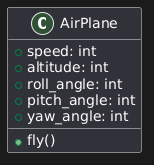

In [1]:
class AirPlane:
    def __init__(self, speed: int, altitude: int, roll_angle: int, pitch_angle: int, yaw_angle: int) -> None:
        self.speed: int = speed
        self.altitude: int = altitude
        self.roll_angle: int = roll_angle
        self.pitch_angle: int = pitch_angle
        self.yaw_angle: int = yaw_angle

    def fly(self) -> None:
        print(f"Airplane is flying at {self.speed} km/h")

    def __str__(self) -> str:
        return f"{self.speed} km/h, {self.altitude} m, {self.roll_angle}°, {self.pitch_angle}°, {self.yaw_angle}°"

In [2]:
air_plane = AirPlane(speed=900, altitude=10000, roll_angle=0, pitch_angle=0, yaw_angle=0)
print(air_plane)
air_plane.fly()

900 km/h, 10000 m, 0°, 0°, 0°
Airplane is flying at 900 km/h



### Ejemplo 2: Reserva de vuelo

En este segundo ejemplo, la clase `AirPlane` es una abstracción centrada en la reserva de asientos. Veamos cómo se aplica la abstracción:

1. **Atributos simplificados**: Solo se consideran el número de asientos y si es VIP.

2. **Métodos específicos**: Se incluyen métodos relevantes para la reserva (`reserve_seat`, `validate_seat`, `get_price`).

3. **Encapsulación**: La validación de asientos está encapsulada en un método separado.

4. **Lógica de precios simplificada**: Se usa una lógica simple para determinar el precio basado en el número de asiento.

@startuml
' Ejemplo 2: AirPlane (reserva de vuelo)
class AirPlaneReserva {
    + seats: int
    + is_vip: bool
    + reserve_seat(seat_number)
    + validate_seat(seat_number)
    + get_price(seat_number)
}
@enduml
https://editor.plantuml.com/uml/TO-x3i8m34NtV8KtMh4nPYe3E-878hUna97pK9ncGVmxhOYG6BY3XtkEBDr9AvQw1Z47k3meP4bmid3cSXMC14CXfT8GF45RIT9e5a7Lht7h_6bWon6KiAe5ZhKNhAvnjZ2d9Btw_2ItkyD-N5p3J6NilA6mn_fVk5DrkV12l_1b9ef-6_C6

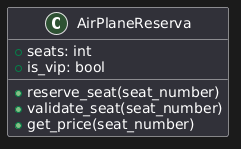

In [3]:
class AirPlane:
    def __init__(self, seats: int, is_vip: bool) -> None:
        self.seats: int = seats
        self.is_vip: bool = is_vip

    def reserve_seat(self, seat_number: int) -> None:
        if not self.validate_seat(seat_number):
            print(f"Seat number {seat_number} is not valid")
            return
        print(f"Seat number {seat_number} is reserved")

    def validate_seat(self, seat_number: int) -> bool:
        return seat_number <= self.seats

    def get_price(self, seat_number: int) -> float:
        if 0 < seat_number <= self.seats // 2:
            return 100.0
        return 200.0

    def __str__(self) -> str:
        return f"{self.seats} seats"

In [4]:
air_plane = AirPlane(seats=150, is_vip=False)
print(air_plane)
air_plane.reserve_seat(seat_number=10)
print(air_plane.get_price(seat_number=120))
air_plane.reserve_seat(seat_number=200)

150 seats
Seat number 10 is reserved
200.0
Seat number 200 is not valid


## Ejercicios prácticos y preguntas de reflexión

1. Piensa en otro objeto del mundo real (por ejemplo, un teléfono móvil). ¿Qué atributos y métodos incluirías en su clase para aplicar la abstracción?
2. Modifica la clase `AirPlane` para agregar un método que simule el aterrizaje.
3. ¿Por qué es útil ocultar detalles de implementación en una clase?

### Autoevaluación
- ¿Qué ventajas aporta la abstracción al desarrollo de software?
- ¿Puedes dar un ejemplo de abstracción en tu vida diaria?

In [ ]:
## EJERCICIO
## CONSOLA DE VIDEOJUEGOS
@startuml
class ConsolaVideoJuegosEmpresa {
    + procesador: string
    + almacenamiento: int
    + memoria: int
    + rendimiento()
}

class ConsolaVideoJuegosUsuario {
    + precioVenta: float
    + precioJuegos: float
    + es_portable: bool
    + validarRetrocompatibilidad(retro: bool)
}
@enduml

https://editor.plantuml.com/uml/TL0n3i8m3DppYen5_A1J9SJ2Y4HNv3QcifJ4aUso8FvEgdPe1xpvpkSxkrC3iJb5DqPGzHVEoX5w2iYt6IVMQog22lxZVAspBy9ZxGDBwzM4yhGH41ECc24HPkFMKxQDIPXO2FQGO0wqJZOdztL_xHywWn3lx74axgkmxdj51ZiGg-Z8e3uBYy4GiVK3SzpmDqGA87UqUXAd0aO3BL1ePC7MuILTLzCkF_e1


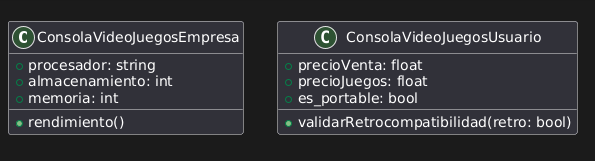

## Conclusión

La abstracción en POO nos permite modelar sistemas complejos de manera más manejable. En los ejemplos de `AirPlane`, vemos cómo podemos representar diferentes aspectos de un avión (su vuelo y su sistema de reservas) de forma simplificada, centrándose en los detalles relevantes para cada caso de uso.

Esta capacidad de abstraer conceptos complejos en modelos más simples y manejables es fundamental en el desarrollo de software. Permite a los desarrolladores crear sistemas más organizados, flexibles y fáciles de mantener. Además, facilita la comunicación entre diferentes partes del sistema y entre los miembros del equipo de desarrollo.

En el mundo real del desarrollo de software, la abstracción nos ayuda a crear APIs limpias, frameworks flexibles y sistemas que pueden evolucionar con el tiempo sin necesidad de reescribir grandes porciones de código. Es una habilidad esencial para cualquier desarrollador de software que busque crear soluciones elegantes y duraderas.

## Referencias y recursos
- [Documentación oficial de Python: clases y abstracción](https://docs.python.org/es/3/tutorial/classes.html)
- [POO en Python - Abstracción (W3Schools)](https://www.w3schools.com/python/python_classes.asp)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)